In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from solutions.utils.constants import FRONTIER_COUNT, FRONTIER_FEATURES

In [2]:
Q = torch.load("data/Q_function_5.pth", map_location=torch.device('cpu'), weights_only=False)

In [3]:
keys = [
    'size',
    'count',
    'distance',
    'repulsion_angle',
    'direction_angle',
    'distance_last'
]
keys.sort()
keys

['count',
 'direction_angle',
 'distance',
 'distance_last',
 'repulsion_angle',
 'size']

In [4]:
actions = np.zeros(6)
for _ in range(1000):
    obs = torch.tensor(np.random.random(39), dtype=torch.float32)
    obs[-3] = 0.5
    obs[-2] = 0.01
    obs[-1] = 0.2
    with torch.no_grad():
        out = Q(obs).cpu().numpy()
        actions[np.argmax(out)] += 1
print(actions)

[  2. 337.  40. 108. 177. 336.]


In [15]:
reward = []
exp = []

for i in range(100): 
    e =  (i/100)
    exp.append(e)
    
    obs = torch.tensor(np.zeros(39), dtype=torch.float32)
    for i in range(FRONTIER_FEATURES):
        obs[FRONTIER_COUNT*i+5] = 1
    obs[-3] = e
    obs[-2] = 0.05
    obs[-1] = 0.3
    with torch.no_grad():
        out = Q(obs)
        reward.append(out.cpu().numpy())

reward = np.array(reward)
        

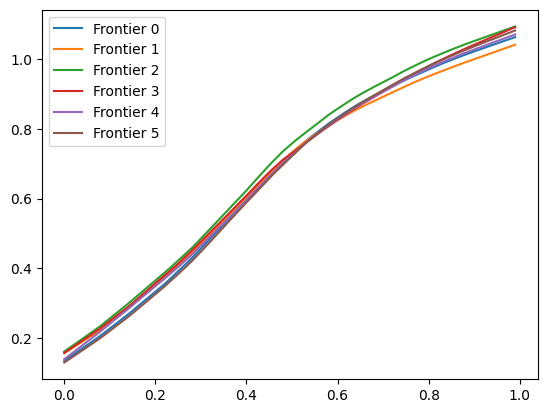

In [16]:
for i in range(FRONTIER_COUNT):
    plt.plot(exp,reward[:,i],label=f"Frontier {i}")
plt.legend()
plt.show()